## **SVM - Máquinas de Vetores de Suporte**

* Em geral `SUPERA` outros algoritmos de aprendizagem de máquina
* Bastante utilizado para tarefas complexas: reconhecimento de voz, imagens
* Foi considerado por vários anos como `o mais eficiente algoritmo`. (Não é superior a Redes Neurais)

## **Aprendizagem**

* Aprende hiperplanos de separação com `margem máxima`
* A ideia do algoritmo é encontrar a melhor reta (margem máxima) possível
<div>
    <img src="imagens/1.png">
</div>


* O algoritmo irá `encontrar o hiperplano/linha` que maxime o valor da margem para os registros de cada uma das classes
* Este algoritmo procura `minimizar o erro` através da busca da melhor margem máxima
* Na configuração desse algoritmo, precisamos passar o valor de `c`, que representa a punição por classificação `incorreta`
    * Um c alto, significa que o algoritmo vai tentar 100% de separação (menos erros) 
    * Um c baixo, permite mais erros
    * É importante realizar `testes` com o valor de c
<br>
<div>
    <img src="imagens/2.png">
</div>
<div>
    <img src="imagens/3.png">
</div>

## **Problema Linear x Problema Não Linear**

* Na imagem da esquerda trata-se de um problema linear, onde conseguimos traçar um reta que separa as duas classes
* Já na imagem da direita não conseguimos traçar uma reta que separa as duas classes, portanto, trata-se de um problema não linear
<div>
    <img src="imagens/4.png">
</div>

## **Para trabalhar com SVMs não lineares - Kernel Tricks**

* Para utilizar SVMs não lineares pode-se utilizar um técnica chamada Kernel Tricks
* Um problema linear é aquele no qual é possível separar duas classes apenas com uma reta. Por outro lado, um problema não-linear é quando não é possível traçar uma reta para separar os dados. Nesse caso, é possível utilizar as técnicas de kernels do SVM para transformar um problema não linearmente separável em um problema linearmente separável

<div>
    <img src="imagens/5.png">
</div>

* No exemplo abaixo temos um exemplo de Kernel linear, onde são utilizados os próprios dados para gerar uma segunda dimensão. 

<div>
    <img src="imagens/6.png">
</div>

* Existem alguns tipos de Kernel: o linear, o gaussiano, polinomial e da tangente hiperbólica
* Essas funções de Kernel transformam as superficíes não lineares em superfícies lineares

## **SVM - Vantagens**

* Sofre pouca influência por ruído nos dados
* Utilizado para `classificação` e `regressão`
* Aprende conceitos não presentes nos dados originais. Ele pode criar novos atributos baseados nos atributos originais. Exemplo: temos os atributos latitude e longitude → o algoritmo consegue criar o atributo 'altitude'
* Mais fácil de utilizar do que redes neurais

## **SVM - Desvantagens**

* É necessário testar várias combinações de parâmetros de entrada
    * Testar o valor de c e o de kernel
* É lento por conta dos cálculos matemáticos
* Black box → não conseguimos visualizar. Não é igual com árvores de decisão que conseguimos visualizar as árvores

## **SVM - Implementação**

In [1]:
from sklearn.svm import SVC

## **Base Credit Data**

In [2]:
import pickle

with open('base_dados/credit.pkl', 'rb') as f:
    X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

In [3]:
X_credit_treinamento.shape , y_credit_treinamento.shape

((1500, 3), (1500,))

In [4]:
X_credit_teste.shape , y_credit_teste.shape

((500, 3), (500,))

In [9]:
# primeiro testando com o kernel linear que é o mais simples
# `98,8% `de acurácia quando utilizamos como parâmetro `kernel = rbf e C = 2.0`
# `98,2% `de acurácia quando utilizamos como parâmetro `kernel = rbf e C = 1.0`
# `96,8% `de acurácia quando utilizamos como parâmetro `kernel = poly e C = 1.0`
# `94,6% `de acurácia quando utilizamos como parâmetro `kernel = linear e C = 1.0`
# `83,8% `de acurácia quando utilizamos como parâmetro `kernel = sigmoid e C = 1.0`

svm_credit = SVC(kernel='rbf', C=2.0, random_state=1)

svm_credit.fit(X_credit_treinamento, y_credit_treinamento)

SVC(C=2.0, random_state=1)

In [10]:
previsoes = svm_credit.predict(X_credit_teste)
previsoes
# Previsão

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [11]:
# Resposta real
y_credit_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [14]:
from sklearn.metrics import accuracy_score, classification_report

# analisando a acurácia
accuracy_score(y_credit_teste, previsoes)

0.988

* `98,8% `de acurácia quando utilizamos como parâmetro `kernel = rbf e C = 2.0`
* `98,2% `de acurácia quando utilizamos como parâmetro `kernel = rbf e C = 1.0`
* `96,8% `de acurácia quando utilizamos como parâmetro `kernel = poly e C = 1.0`
* `94,6% `de acurácia quando utilizamos como parâmetro `kernel = linear e C = 1.0`
* `83,8% `de acurácia quando utilizamos como parâmetro `kernel = sigmoid e C = 1.0`

0.988

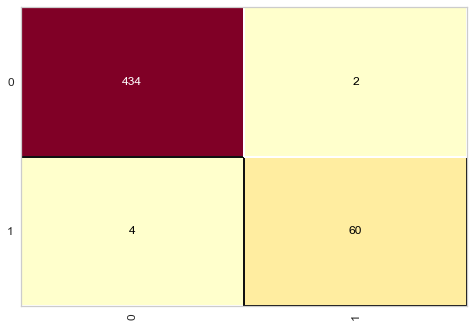

In [13]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(svm_credit)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)

## **Conseguimos 98,8% de acurácia**

In [15]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       436
           1       0.97      0.94      0.95        64

    accuracy                           0.99       500
   macro avg       0.98      0.97      0.97       500
weighted avg       0.99      0.99      0.99       500



## **Base Census**

In [16]:
import pickle

with open('base_dados/census.pkl', 'rb') as f:
    X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste = pickle.load(f)

In [17]:
X_census_treinamento.shape , y_census_treinamento.shape

((27676, 108), (27676,))

In [18]:
X_census_teste.shape , y_census_teste.shape

((4885, 108), (4885,))

In [23]:
svm_census = SVC(kernel='linear', C=1.0, random_state=1)

svm_census.fit(X_census_treinamento, y_census_treinamento)

SVC(kernel='linear', random_state=1)

In [24]:
previsoes_census = svm_census.predict(X_census_teste)

previsoes_census
# previsões

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [25]:
y_census_teste
# respostas reais

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [26]:
from sklearn.metrics import accuracy_score, classification_report

# analisando a acurácia
accuracy_score(y_census_teste, previsoes_census)

0.8507676560900717

0.8507676560900717

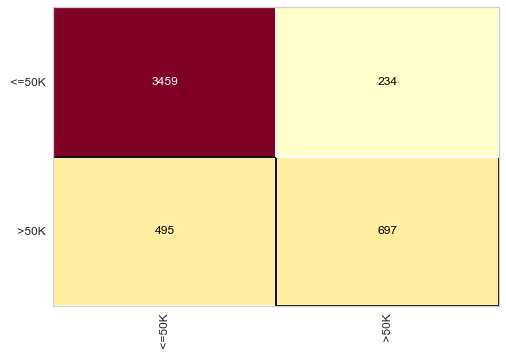

In [27]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(svm_census)
cm.fit(X_census_treinamento, y_census_treinamento)
cm.score(X_census_teste, y_census_teste)